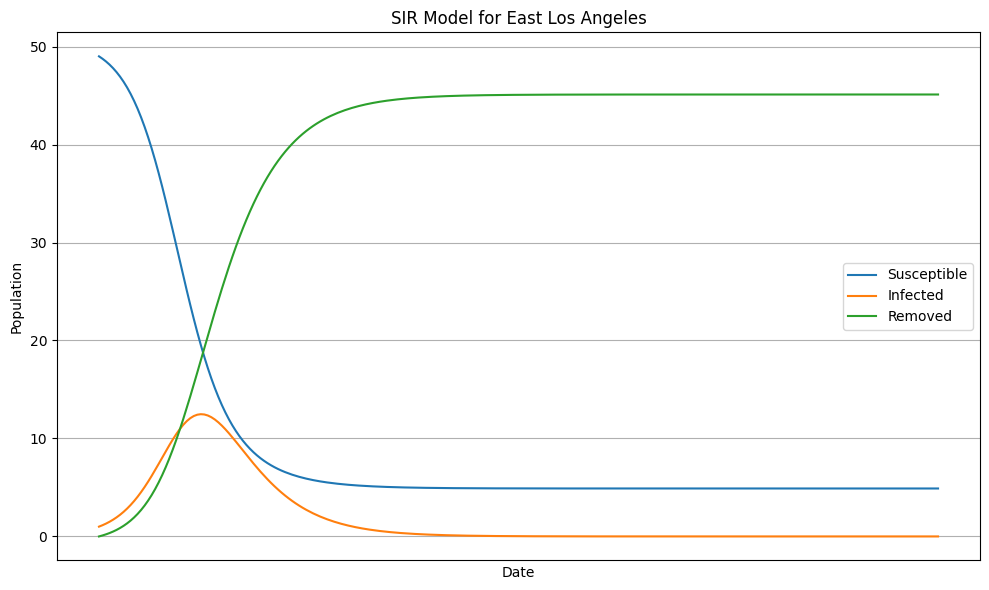

In [5]:
# 重新运行并加上“跳过空社区”的逻辑
valid_community_sir = {}

for community in communities:
    sub_df = df[df['Community'] == community].sort_values(by='Time')
    
    if sub_df.empty:
        continue  # 跳过无数据社区

    I0 = sub_df['Cases'].iloc[0]
    Nc = 50 * I0  # 粗略估计人口

    S = [Nc - I0]
    I = [I0]
    R = [0]

    for t in range(1, days_to_simulate):
        St = S[-1]
        It = I[-1]
        Rt = R[-1]

        new_S = St - beta * St * It / Nc
        new_I = It + beta * St * It / Nc - gamma * It
        new_R = Rt + gamma * It

        S.append(max(new_S, 0))
        I.append(max(new_I, 0))
        R.append(max(new_R, 0))

    valid_community_sir[community] = {
        'S': S,
        'I': I,
        'R': R,
        'Nc': Nc
    }

# 再次尝试绘制 East Los Angeles 的曲线
sample_community = 'East Los Angeles'
if sample_community in valid_community_sir:
    plt.figure(figsize=(10, 6))
    plt.plot(dates, valid_community_sir[sample_community]['S'], label='Susceptible')
    plt.plot(dates, valid_community_sir[sample_community]['I'], label='Infected')
    plt.plot(dates, valid_community_sir[sample_community]['R'], label='Removed')
    plt.title(f'SIR Model for {sample_community}')
    plt.xlabel('Date')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"{sample_community} 不在有效社区中～")

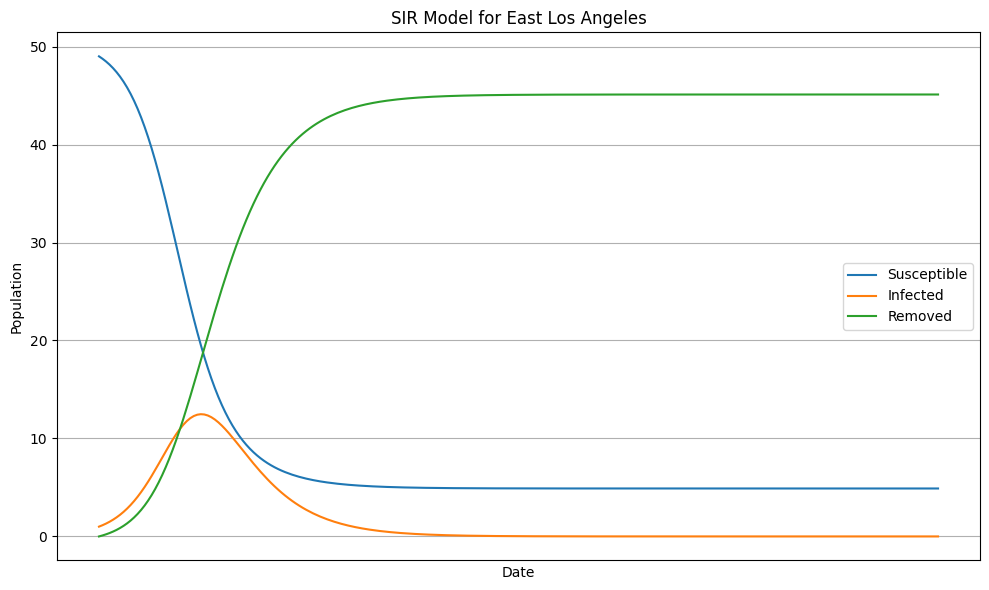

In [6]:
# Re-run the model and skip communities with no data
valid_community_sir = {}

for community in communities:
    sub_df = df[df['Community'] == community].sort_values(by='Time')
    
    if sub_df.empty:
        continue  # Skip community with no data

    I0 = sub_df['Cases'].iloc[0]
    Nc = 50 * I0  # Rough estimate of total population

    S = [Nc - I0]
    I = [I0]
    R = [0]

    for t in range(1, days_to_simulate):
        St = S[-1]
        It = I[-1]
        Rt = R[-1]

        new_S = St - beta * St * It / Nc
        new_I = It + beta * St * It / Nc - gamma * It
        new_R = Rt + gamma * It

        S.append(max(new_S, 0))
        I.append(max(new_I, 0))
        R.append(max(new_R, 0))

    valid_community_sir[community] = {
        'S': S,
        'I': I,
        'R': R,
        'Nc': Nc
    }

# Try plotting the curve for East Los Angeles
sample_community = 'East Los Angeles'
if sample_community in valid_community_sir:
    plt.figure(figsize=(10, 6))
    plt.plot(dates, valid_community_sir[sample_community]['S'], label='Susceptible')
    plt.plot(dates, valid_community_sir[sample_community]['I'], label='Infected')
    plt.plot(dates, valid_community_sir[sample_community]['R'], label='Removed')
    plt.title(f'SIR Model for {sample_community}')
    plt.xlabel('Date')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"{sample_community} is not in the valid community list.")